In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv(r'C:/Users/Mridula/pd_speech_features.csv')

In [3]:
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [5]:
df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [6]:
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

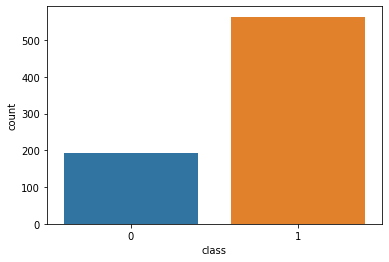

In [7]:
sns.countplot(x='class', data=df)

In [8]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

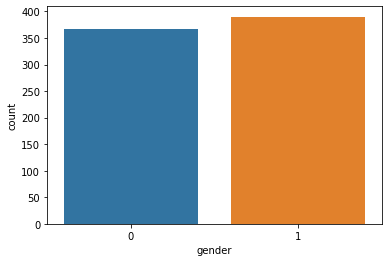

In [9]:
sns.countplot(x='gender', data=df)

In [10]:
df['gender'].value_counts()

1    390
0    366
Name: gender, dtype: int64

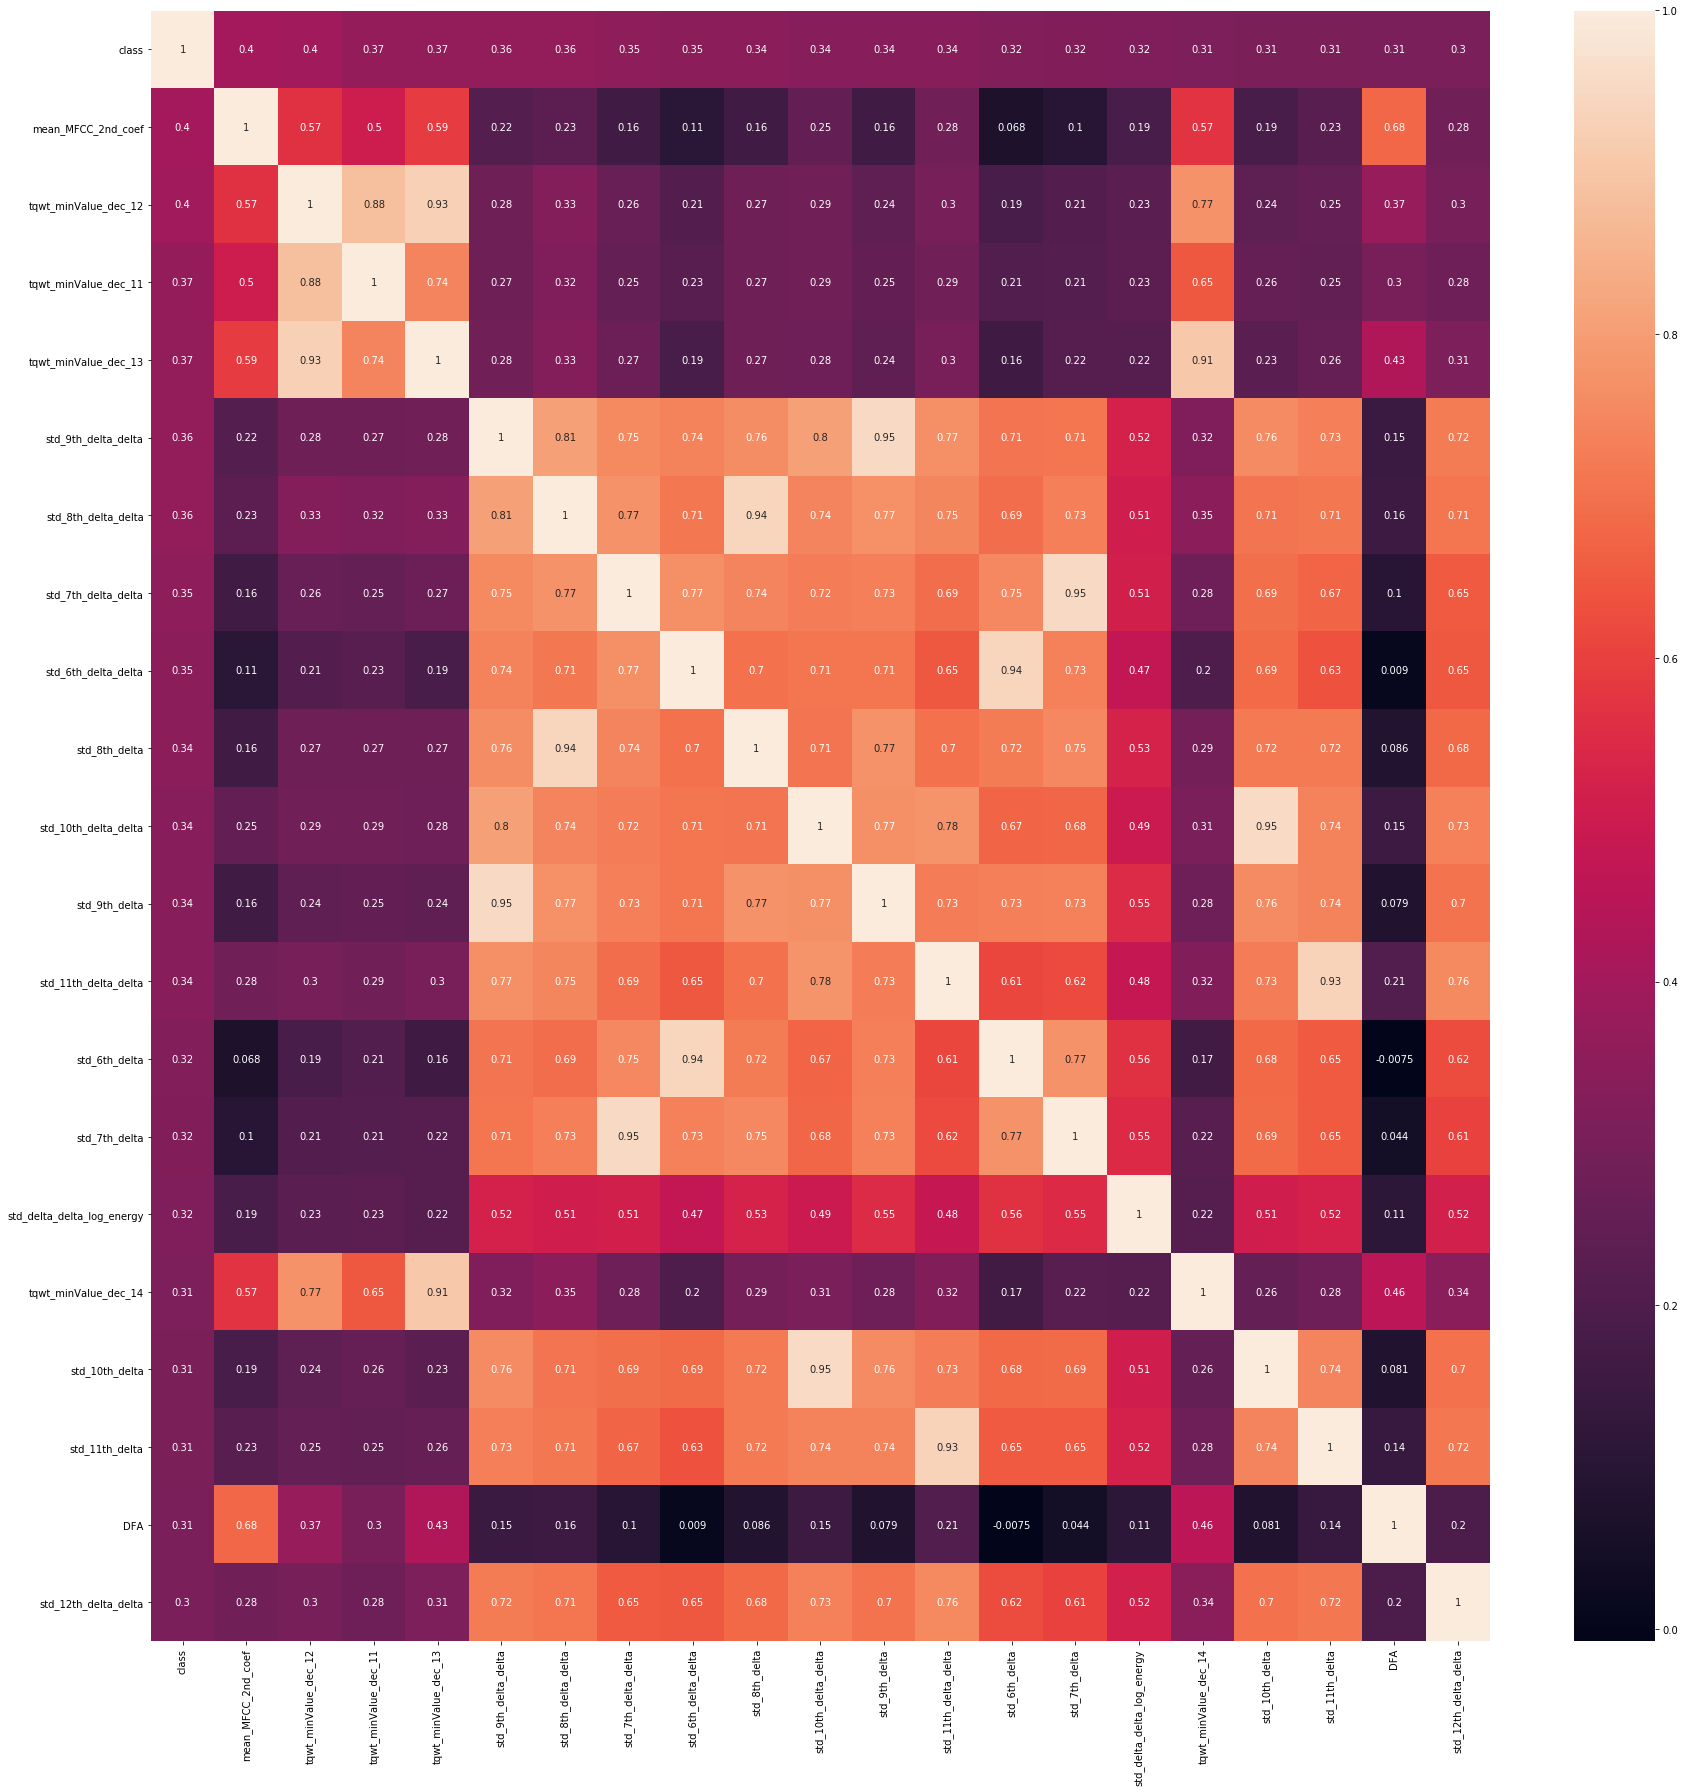

In [11]:
plt.figure(figsize=(30,30))
corr=df.corr()
cols=corr.nlargest(21, 'class')['class'].index
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, annot=True, fmt='.2g', xticklabels=cols.values, yticklabels=cols.values)
plt.yticks(rotation=0, size=10)
plt.xticks(rotation=90, size=10)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [13]:
y=df['class']
X=df.drop('class', axis=1)

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(604, 754) (152, 754) (604,) (152,)


## A. Original Dataset

## 1. RandomForestClassifier

In [59]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
rf_score=cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest Classifier Score is :",  round(rf_score.mean()*100,2), "%")


Random Forest Classifier Score is : 87.41 %


In [16]:
rf_predict=rf.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, rf_predict))

[[ 23  15]
 [  7 107]]


In [63]:
from sklearn.metrics import accuracy_score
print("Accuracy score is :", round(accuracy_score(y_test, rf_predict)*100,2), "%")

Accuracy score is : 85.53 %


## 2.DecisionTreeClassifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_score=cross_val_score(tree, X_train, y_train, cv=10)
print("Decision Tree Classifier Score is :",  round(tree_score.mean()*100,2), "%")

Decision Tree Classifier Score is : 80.29 %


In [66]:
tree_predict=tree.predict(X_test)
print(confusion_matrix(y_test, tree_predict))
print("Accuracy score is :", round(accuracy_score(y_test, tree_predict)*100,2), "%")

[[ 23  15]
 [ 13 101]]
Accuracy score is : 81.58 %


## 3.XGBoost

In [22]:
import xgboost 

In [23]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [24]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [25]:
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec= divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s secondas.' % (thour, tmin, round(tsec, 2)))

In [26]:
classifier=xgboost.XGBClassifier()

In [27]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [28]:
from datetime import datetime

In [29]:
start_time=timer(None)
random_search.fit(X,y)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    8.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.2s finished



 Time taken: 0 hours 0 minutes and 9.95 secondas.


In [30]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 8,
 'learning_rate': 0.15,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

In [32]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
                                max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
                                n_estimators=100, n_jobs=1, nthread=None, objective='binary:logistic',
                                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                                seed=None, silent=True, subsample=1)

In [33]:
xgb_score=cross_val_score(classifier, X, y, cv=5)
print(xgb_score.mean())

[11:11:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:11:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:11:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

## B. UnderSampling

In [34]:
from imblearn.under_sampling import NearMiss

In [35]:
nm=NearMiss()
X_res, y_res=nm.fit_sample(X,y)

In [36]:
print(X_res.shape, y_res.shape)

(384, 754) (384,)


In [37]:
from collections import Counter

In [38]:
print('Original Dataset{}'.format(Counter(y)))
print('New Dataset{}'.format(Counter(y_res)))

Original DatasetCounter({1: 564, 0: 192})
New DatasetCounter({0: 192, 1: 192})


In [39]:
from sklearn.model_selection import train_test_split
X_res_train, X_res_test, y_res_train, y_res_test=train_test_split(X_res, y_res, test_size=0.2, random_state=42)

## 1.RandomForestClassifier

In [40]:
rf=RandomForestClassifier()
rf.fit(X_res_train, y_res_train)
rf_score=cross_val_score(rf, X_res_train, y_res_train, cv=5)
print(rf_score.mean())

0.8240613432046537


In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [42]:
rf_nm_pred=rf.predict(X_res_test)
print(confusion_matrix(y_res_test, rf_nm_pred))
print('Accuracy Score is :', (accuracy_score(y_res_test, rf_nm_pred)))
print('f1_score is:',(f1_score(y_res_test, rf_nm_pred)))
print('recall_score is :', (recall_score(y_res_test, rf_nm_pred)))
print('precision score:', (precision_score(y_res_test, rf_nm_pred)))

[[36 11]
 [ 6 24]]
Accuracy Score is : 0.7792207792207793
f1_score is: 0.7384615384615385
recall_score is : 0.8
precision score: 0.6857142857142857


## 2. DecisionTreeClassifier

In [43]:
tree_res=DecisionTreeClassifier()
tree_res.fit(X_res_train, y_res_train)
tree_res_score=cross_val_score(tree_res, X_res_train, y_res_train, cv=5)
print(tree_res_score.mean())

0.700211528291909


In [44]:
tree_nm_pred=tree.predict(X_res_test)
print(confusion_matrix(y_res_test, tree_nm_pred))
print('Accuracy Score is :', (accuracy_score(y_res_test, tree_nm_pred)))
print('f1_score is:',(f1_score(y_res_test, tree_nm_pred)))
print('recall_score is :', (recall_score(y_res_test, tree_nm_pred)))
print('precision score:', (precision_score(y_res_test, tree_nm_pred)))

[[43  4]
 [ 1 29]]
Accuracy Score is : 0.935064935064935
f1_score is: 0.9206349206349207
recall_score is : 0.9666666666666667
precision score: 0.8787878787878788


## C. OverSampling

In [45]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
ros= RandomOverSampler()

In [47]:
X_os, y_os=ros.fit_sample(X,y)

In [48]:
print(X_os.shape, y_os.shape)

(1128, 754) (1128,)


In [49]:
print('Original dataset is{}'.format(Counter(y)))
print('Original dataset is{}'.format(Counter(y_res)))
print('Oversample dataset is{}'.format(Counter(y_os)))

Original dataset isCounter({1: 564, 0: 192})
Original dataset isCounter({0: 192, 1: 192})
Oversample dataset isCounter({1: 564, 0: 564})


In [50]:
X_os_train, X_os_test, y_os_train,y_os_test=train_test_split(X,y, test_size=0.2, random_state=42)

## 1.RandomForestClassifier

In [51]:
rf=RandomForestClassifier()
rf.fit(X_os_train, y_os_train)
rf_score=cross_val_score(rf, X_os_train,y_os_train, cv=5)
print(rf_score.mean())

0.8741322314049587


In [52]:
rf_os_pred=rf.predict(X_os_test)
print(confusion_matrix(y_os_test, rf_os_pred))
print("Accuracy score is:", (accuracy_score(y_os_test, rf_os_pred)))
print("f1_score is:", (f1_score(y_os_test, rf_os_pred)))
print("Precision Score is :", (precision_score(y_os_test, rf_os_pred)))
print("Recall score is :", (recall_score(y_os_test, rf_os_pred)))


[[ 22  16]
 [  3 111]]
Accuracy score is: 0.875
f1_score is: 0.9211618257261411
Precision Score is : 0.8740157480314961
Recall score is : 0.9736842105263158


## 2. DecisionTreeClassifier

In [53]:
tree_os=DecisionTreeClassifier()
tree_os.fit(X_os_train, y_os_train)
tree_os_score=cross_val_score(tree_os, X_os_train, y_os_train, cv=5)
print(tree_os_score.mean())

0.7980440771349862


In [54]:
tree_os_pred=tree_os.predict(X_os_test)
print(confusion_matrix(y_os_test, tree_os_pred))
print("Accuracy score is:", (accuracy_score(y_os_test, tree_os_pred)))
print("f1_score is:", (f1_score(y_os_test, tree_os_pred)))
print("Precision Score is :", (precision_score(y_os_test, tree_os_pred)))
print("Recall score is :", (recall_score(y_os_test, tree_os_pred)))

[[20 18]
 [16 98]]
Accuracy score is: 0.7763157894736842
f1_score is: 0.8521739130434783
Precision Score is : 0.8448275862068966
Recall score is : 0.8596491228070176


## D. Conclusion

#### 1. Imbalanced datasheet
#### 2. Model prediction using Original Dataseet
#####   1. RandomForestClassifier: 87.41%
#####   2. DecisionTreeClassifier: 80.29%
#####   3. XGBoost: 83.60%
   
#### 3. Model prediction using UnderSampling

#####   1. RandomForestClassifier: 82.4%
   
        1. confusion matrix: [[36 11]
                             [ 6 24]]
       2. Accuracy Score is : 0.7792207792207793
       3. f1_score is: 0.7384615384615385
       4. recall_score is : 0.8
       5.precision score: 0.6857142857142857 

#####   2. DecisionTreeClassifier:70.0 %
     1.Confusion Matrix: [[43  4]
                         [ 1 29]]
     2. Accuracy Score is : 0.935064935064935
     3. f1_score is: 0.9206349206349207
     4. recall_score is : 0.9666666666666667
     5. precision score: 0.8787878787878788

#### 4. Model prediction using OverSampling
  
#####  1. RandomForestClassifier:87.4%
      1.confusion matrix: [[ 22  16]
                         [  3 111]]
                         
       2. Accuracy score is: 0.875
       
       3. f1_score is: 0.9211618257261411
       
       4.Precision Score is : 0.8740157480314961
       
       5. Recall score is : 0.9736842105263158
   
   
#####   2. DecisionTreeClassifier:79.8%
     
     1.Confusion matrix: [[20 18]
                         [16 98]]
      2. Accuracy score is: 0.7763157894736842
      3. f1_score is: 0.8521739130434783
      4. Precision Score is : 0.8448275862068966
      5. Recall score is : 0.8596491228070176